In [1]:
%matplotlib inline 
import os
import os.path as osp 
import sys  
sys.path.insert(0, '')

from tqdm import tqdm 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
csvPath = osp.join('.', 'val_dataframe.csv')
data = pd.read_csv(csvPath, index_col=[0])

In [3]:
data.sample(3)

bbox_x1  bbox_y1  bbox_x2  bbox_y2  image_width  image_height  \
154547      0.0      0.0    640.0    396.0        640.0         480.0   
47661       0.0      0.0    640.0    358.0        640.0         480.0   
74114       0.0    128.0    444.0    419.0        640.0         480.0   

           class                                          yaml_path  \
154547  HF010787  /home/ubuntu/workspace_aihub/data/refined/v2/v...   
47661   HF010642  /home/ubuntu/workspace_aihub/data/refined/v2/v...   
74114   HF030055  /home/ubuntu/workspace_aihub/data/refined/v2/v...   

                                               image_path  
154547  /home/ubuntu/workspace_aihub/data/refined/v2/v...  
47661   /home/ubuntu/workspace_aihub/data/refined/v2/v...  
74114   /home/ubuntu/workspace_aihub/data/refined/v2/v...

In [4]:
data.describe()

bbox_x1        bbox_y1        bbox_x2        bbox_y2  \
count  270441.000000  270441.000000  270441.000000  270441.000000   
mean      138.705281     115.643294     503.188965     346.029881   
std       113.629191      79.577819     112.031177      81.409911   
min         0.000000       0.000000      17.000000      15.000000   
25%        14.000000      47.000000     413.000000     285.000000   
50%       138.000000     119.000000     504.000000     336.000000   
75%       230.000000     179.000000     626.000000     407.000000   
max      1055.000000     598.000000    1333.000000     707.000000   

       image_width  image_height  
count     270441.0      270441.0  
mean         640.0         480.0  
std            0.0           0.0  
min          640.0         480.0  
25%          640.0         480.0  
50%          640.0         480.0  
75%          640.0         480.0  
max          640.0         480.0

***

In [5]:
wh = [] 
for anno in range(len(data)):
    aw = float(data['image_width'][anno])   
    ah = float(data['image_height'][anno])
    
    w = (data['bbox_x2'][anno] - data['bbox_x1'][anno]) /aw # make the width range 
    h = (data['bbox_y2'][anno] - data['bbox_y1'][anno]) /ah # make the width range 
    
    temp = [w,h]
    wh.append(temp)
    
wh = np.array(wh)
print("clustering feature data is ready. shape = (N object, width and height) =  {}".format(wh.shape))

clustering feature data is ready. shape = (N object, width and height) =  (270441, 2)


In [6]:
data['b_w'] = (data['bbox_x2'] - data['bbox_x1'])/ data['image_width']
data['b_h'] = (data['bbox_y2'] - data['bbox_y1'])/ data['image_height']

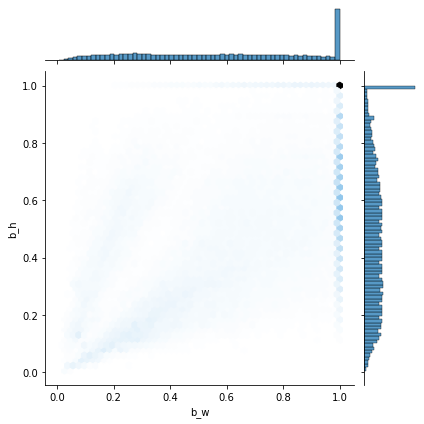

In [7]:
import seaborn as sns

sns.jointplot(data=data, x='b_w', y='b_h', kind='hex', )

In [8]:
data['width_th'] = data.b_w > 0.9
data['height_th'] = data.b_h > 0.9

In [9]:
data['width_th'].value_counts()

False    216439
True      54002
Name: width_th, dtype: int64

In [10]:
data3 = data[data.height_th == False][data.width_th == False]

/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [11]:
len(data3)

207327

***
### Visualize the clustering data 

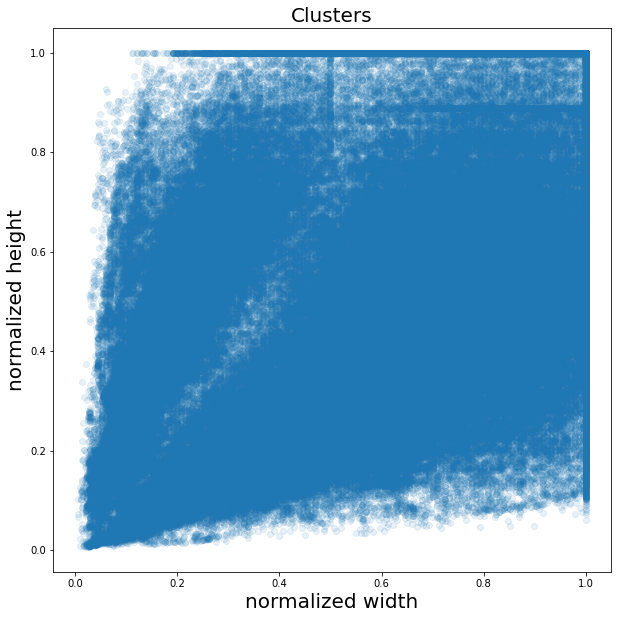

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(wh[:,0],wh[:,1],alpha=0.1)
plt.title("Clusters",fontsize=20)
plt.xlabel("normalized width",fontsize=20)
plt.ylabel("normalized height",fontsize=20)
plt.show()

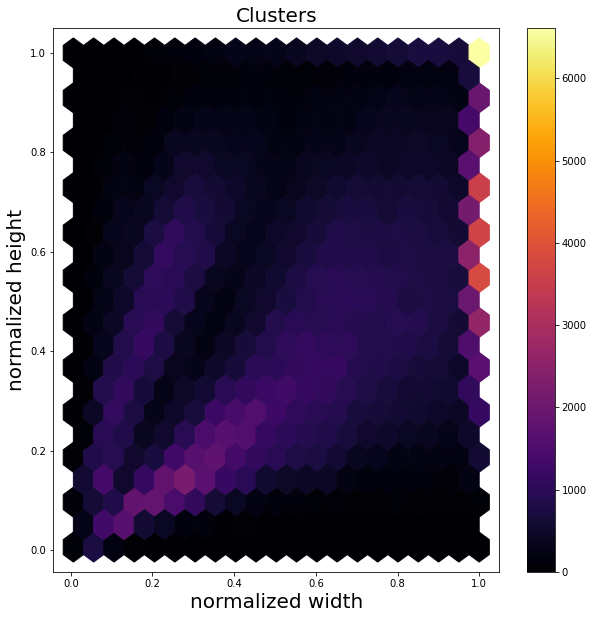

In [13]:
plt.figure(figsize=(10,10))
plt.hexbin(wh[:,0],wh[:,1], gridsize=20, cmap='inferno')
plt.title("Clusters",fontsize=20)
plt.xlabel("normalized width",fontsize=20)
plt.ylabel("normalized height",fontsize=20)
plt.colorbar()
plt.show()

In [14]:
data2 = data[data.bbox_x2 > 630][data.bbox_y2 > 470][data.bbox_y1 < 10][data.bbox_x1 < 10][data['class']=='HF010382']

/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
data2 = data2.reset_index(drop=True)

In [16]:
len(data2)

47

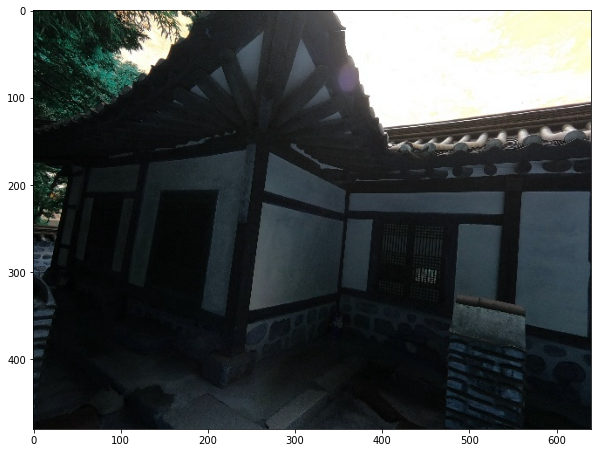

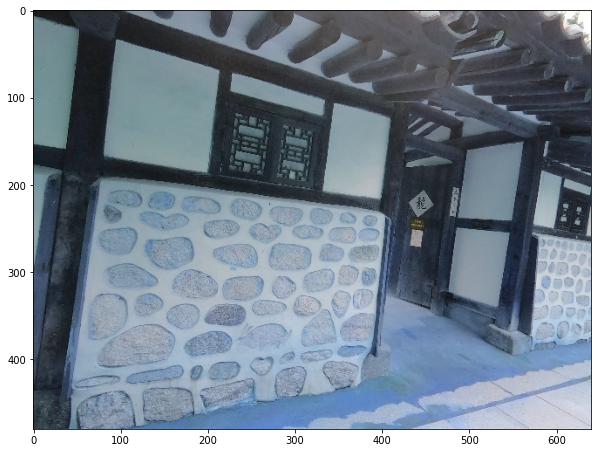

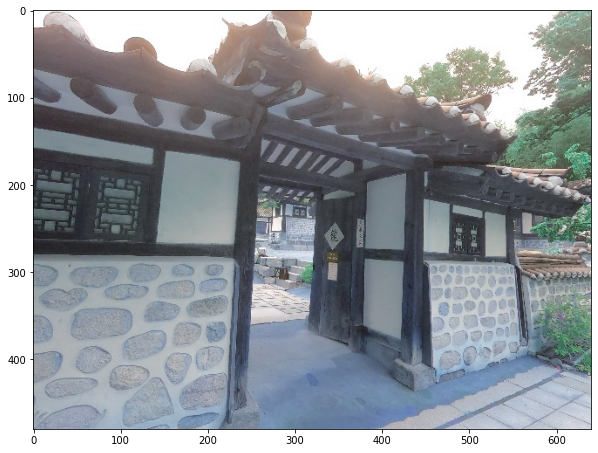

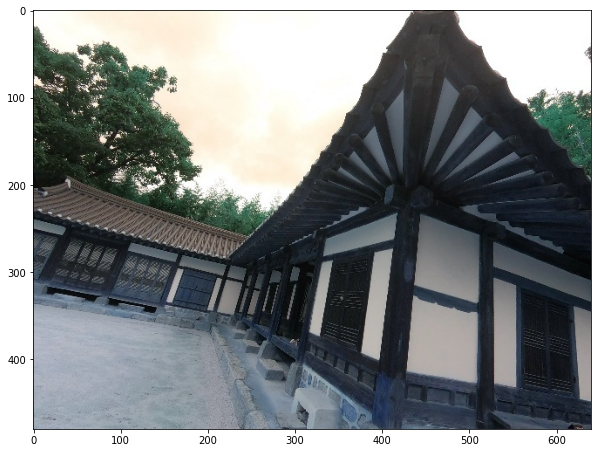

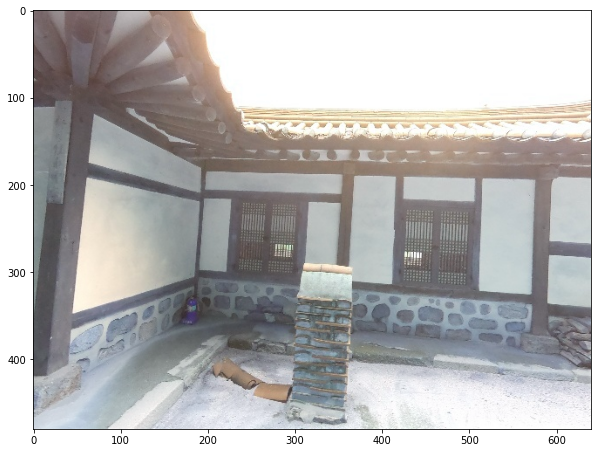

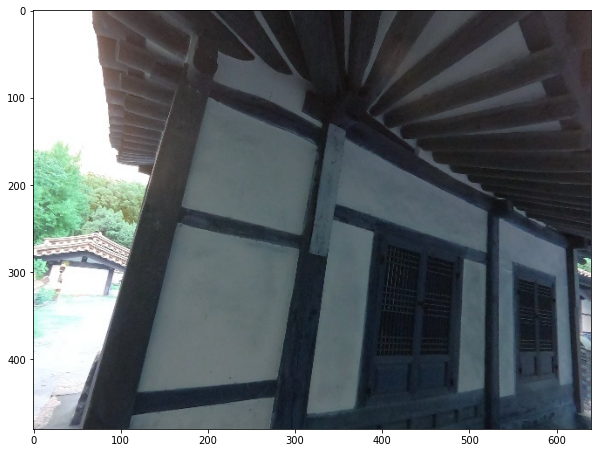

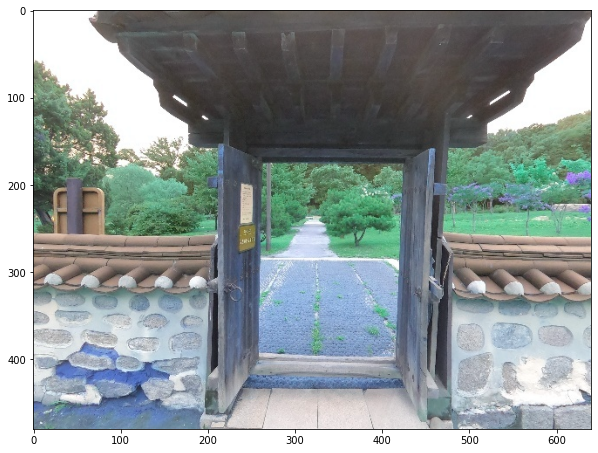

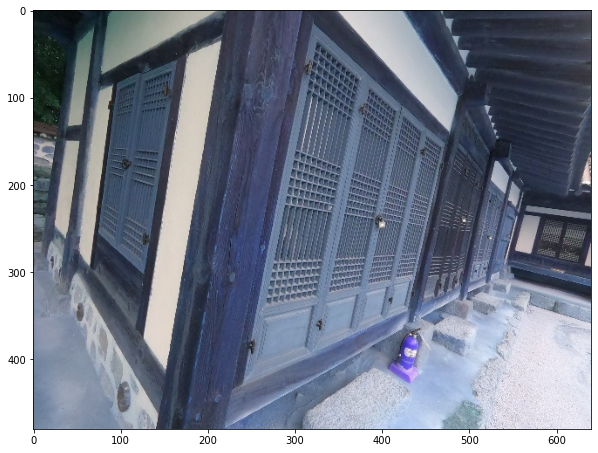

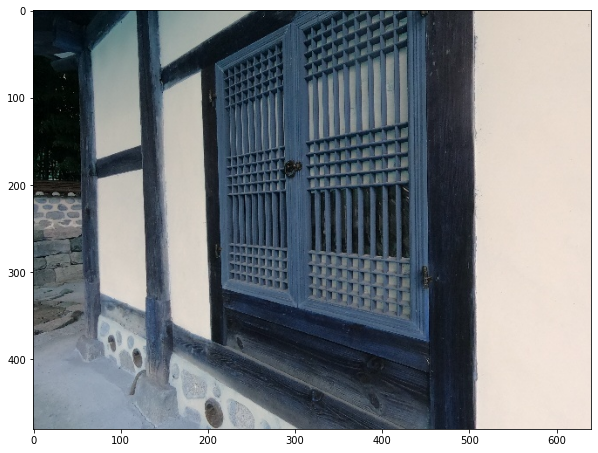

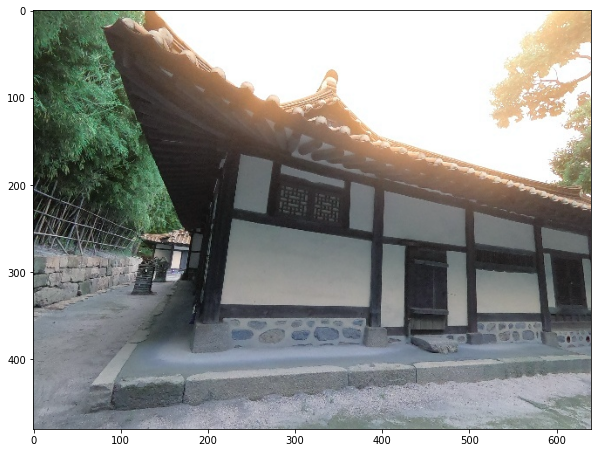

In [17]:
import cv2
import random
random.seed(42)
for i in range(10):
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.imread(data2.loc[random.randint(0, len(data2)-1)].image_path))
    #print(data2.loc[random.randint(0, len(data2))]['class'])
    plt.show()
    

In [18]:
data2.keys()

Index(['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'image_width',
       'image_height', 'class', 'yaml_path', 'image_path', 'b_w', 'b_h',
       'width_th', 'height_th'],
      dtype='object')

In [19]:
from omegaconf import OmegaConf

In [20]:
config = OmegaConf.load(data2.loc[0].yaml_path)

In [21]:
config

{'regions': [{'type': 'box', 'boxcorners': [0, 0, 1920, 1440], 'ansize': [1920, 1440], 'class': '재사', 'tags': ['truncated:0', '종ID:HF010382', '대분류:유적건조물', '중분류:종교신앙', '소분류:종교시설', 'Instance:창녕위궁재사', 'Instance Upper:', 'GPS 위도:', 'GPS 경도:'], 'instance_uri': 'adr:0011967195', 'sem_ext': [{'property': 'description', 'value': '서울 창녕위궁 재사(서울 昌寧尉宮 齋舍)는 서울특별시 강북구에 있는 조선시대에 만들어진 높은 장대석 기단으로 감싸고 있는 \xad전통한식 목조가옥이다. 2002년 9월 13일 대한민국의 등록문화재 제40호로 지정되었다.'}, {'property': 'address', 'value': '서울특별시 강북구 월계로 173'}, {'property': 'related_term', 'value': '조선'}]}], 'bbox': {'x1': 0, 'y1': 0, 'x2': 640, 'y2': 480}}

***
## k-means clustering with IoU

In [22]:
def iou(box, clusters):
    '''
    :param box:      np.array of shape (2,) containing w and h
    :param clusters: np.array of shape (N cluster, 2) 
    '''
    x = np.minimum(clusters[:, 0], box[0]) 
    y = np.minimum(clusters[:, 1], box[1])

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection)

    return iou_

In [23]:
def kmeans(boxes, k, dist=np.median,seed=1):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]

    distances     = np.empty((rows, k)) ## N row x N cluster
    last_clusters = np.zeros((rows,))

    np.random.seed(seed)

    # initialize the cluster centers to be k items
    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        # Step 1: allocate each item to the closest cluster centers
        for icluster in range(k): # I made change to lars76's code here to make the code faster
            distances[:,icluster] = 1 - iou(clusters[icluster], boxes)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break
            
        # Step 2: calculate the cluster centers as mean (or median) of all the cases in the clusters.
        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters,nearest_clusters,distances

### Run the k-means clustering codes with k = 2, 3, 4,...,11.

In [24]:
kmax = 10
dist = np.mean
results = {}
for k in tqdm(range(2,kmax)):
    clusters, nearest_clusters, distances = kmeans(wh,k,seed=2,dist=dist)
    WithinClusterMeanDist = np.mean(distances[np.arange(distances.shape[0]),nearest_clusters])
    result = {"clusters":             clusters,
              "nearest_clusters":     nearest_clusters,
              "distances":            distances,
              "WithinClusterMeanDist": WithinClusterMeanDist}
    print("{:2.0f} clusters: mean IoU = {:5.4f}".format(k,1-result["WithinClusterMeanDist"]))
    results[k] = result

 12%|█▎        | 1/8 [00:00<00:03,  1.83it/s]

 2 clusters: mean IoU = 0.5342


 25%|██▌       | 2/8 [00:02<00:05,  1.03it/s]

 3 clusters: mean IoU = 0.5782


 38%|███▊      | 3/8 [00:04<00:06,  1.32s/it]

 4 clusters: mean IoU = 0.6250


 50%|█████     | 4/8 [00:07<00:07,  1.81s/it]

 5 clusters: mean IoU = 0.6514


 62%|██████▎   | 5/8 [00:14<00:10,  3.49s/it]

 6 clusters: mean IoU = 0.6728


 75%|███████▌  | 6/8 [00:20<00:08,  4.03s/it]

 7 clusters: mean IoU = 0.6904


 88%|████████▊ | 7/8 [00:28<00:05,  5.41s/it]

 8 clusters: mean IoU = 0.7081


100%|██████████| 8/8 [00:37<00:00,  4.73s/it]

 9 clusters: mean IoU = 0.7207


### Visualization of k-means results 

In [25]:
def plot_cluster_result(plt,clusters,nearest_clusters,WithinClusterSumDist,wh):
    for icluster in np.unique(nearest_clusters):
        pick = nearest_clusters==icluster
        c = current_palette[icluster]
        plt.rc('font', size=8) 
        plt.plot(wh[pick,0],wh[pick,1],"p",
                 color=c,
                 alpha=0.5,label="cluster = {}, N = {:6.0f}".format(icluster,np.sum(pick)))
        plt.text(clusters[icluster,0],
                 clusters[icluster,1],
                 "c{}".format(icluster),
                 fontsize=20,color="red")
        plt.title("Clusters")
        plt.xlabel("width")
        plt.ylabel("height")
    plt.legend(title="Mean IoU = {:5.4f}".format(WithinClusterSumDist))

/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
/home/ubuntu/anaconda3/envs/py36aihub/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is d

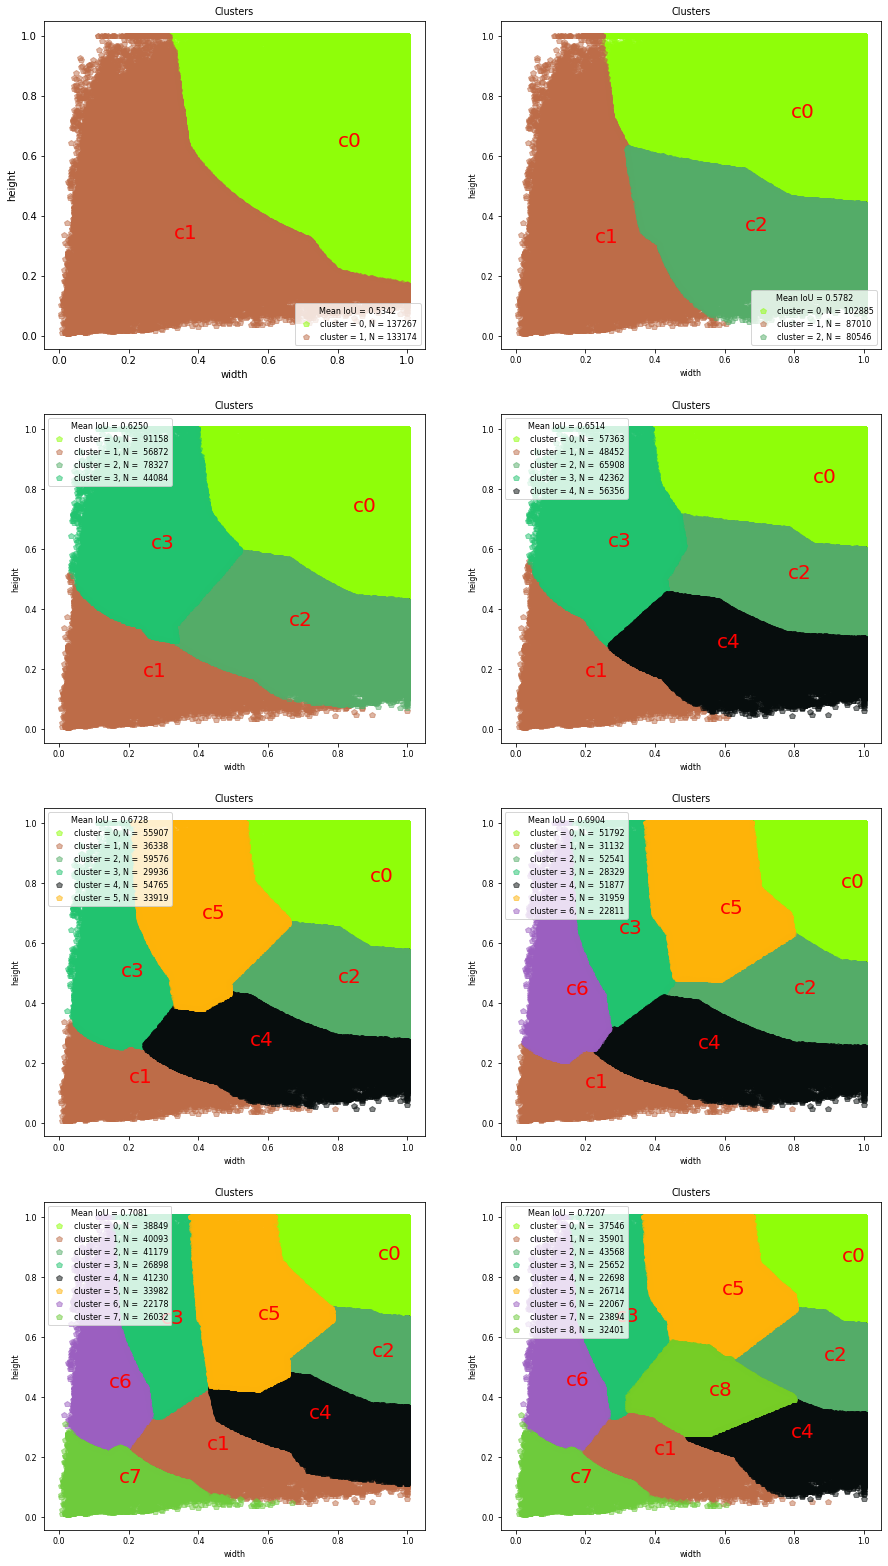

In [26]:
import seaborn as sns
current_palette = list(sns.xkcd_rgb.values())

figsize = (15,35)
count =1 
fig = plt.figure(figsize=figsize)
for k in range(2,kmax):
    result               = results[k]
    clusters             = result["clusters"]
    nearest_clusters     = result["nearest_clusters"]
    WithinClusterSumDist = result["WithinClusterMeanDist"]
    
    ax = fig.add_subplot(kmax/2,2,count)
    plot_cluster_result(plt,clusters,nearest_clusters,1 - WithinClusterSumDist,wh)
    count += 1


In [27]:
plt.show()

#### Elbow curve ; mean IoU vs. N cluster 

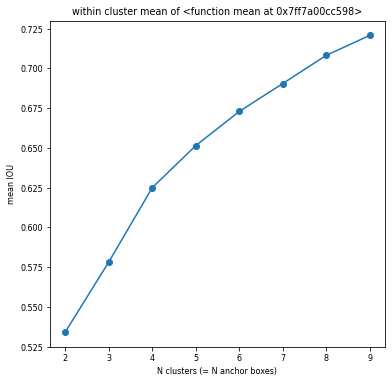

In [28]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(2,kmax),
         [1 - results[k]["WithinClusterMeanDist"] for k in range(2,kmax)],"o-")
plt.title("within cluster mean of {}".format(dist))
plt.ylabel("mean IOU")
plt.xlabel("N clusters (= N anchor boxes)")
plt.show()

***
### The selected anchor box shapes 

In [29]:
Nanchor_box = 9    # select N anchor box 
results[Nanchor_box]["clusters"]

array([[0.93645237, 0.84907541],
       [0.39564532, 0.20689529],
       [0.88581714, 0.51953484],
       [0.28880137, 0.65106895],
       [0.79043211, 0.26304043],
       [0.591605  , 0.74048439],
       [0.14443541, 0.43577372],
       [0.15683422, 0.11239389],
       [0.55467337, 0.40452841]])

In [30]:
results[Nanchor_box]["clusters"] * np.array([640, 480])

array([[599.32951579, 407.55619773],
       [253.21300242,  99.30974068],
       [566.92297099, 249.37672145],
       [184.83287853, 312.51309839],
       [505.876553  , 126.25940612],
       [378.62719922, 355.4325073 ],
       [ 92.43866407, 209.17138714],
       [100.3739014 ,  53.94906671],
       [354.99095707, 194.17363662]])